# **Proyek Akhir MLT: Meal-Type Based Recommendation System for Balanced Nutrition and Most Consumed Foods**

**Algoritma :**

 - **🚂 Logistic Regression (Content-based Filtering)**
 - **🧭 KNN &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(Collaborative Filtering)**

## **🧠 Project Overview**

### **📚 Latar Belakang**

Konsumsi makanan yang tidak seimbang berdampak langsung pada peningkatan penyakit tidak menular (PTM), sehingga diperlukan sistem yang dapat merekomendasikan makanan bergizi berdasarkan kebiasaan makan harian.


Peningkatan prevalensi PTM seperti obesitas, diabetes tipe 2, dan penyakit jantung menjadi tantangan global yang signifikan [1]. Berdasarkan studi oleh GBD Diet Collaborators, pola makan yang buruk bertanggung jawab atas lebih dari 11 juta kematian pada tahun 2017, terutama karena tingginya asupan natrium dan rendahnya konsumsi biji-bijian serta buah [1]. Upaya pencegahan melalui pengaturan pola makan terbukti efektif dalam menekan risiko tersebut [2], [3]. Seiring kemajuan teknologi, machine learning memungkinkan sistem rekomendasi makanan yang mempertimbangkan profil gizi serta preferensi waktu makan (Breakfast, Lunch, Dinner) [4]. Pendekatan seperti content-based filtering dan collaborative filtering telah digunakan secara luas dalam penelitian sistem rekomendasi makanan berbasis nutrisi [5]. Dengan personalisasi dan data konsumsi makanan harian, sistem ini dapat membantu masyarakat memilih makanan sehat secara cerdas dan kontekstual.

### **❓ Why?**

Dengan meningkatnya kesadaran terhadap pentingnya nutrisi, banyak individu membutuhkan panduan dalam memilih makanan yang sesuai waktu makan dan kebutuhan pribadi. Sistem rekomendasi berbasis machine learning dapat mempersonalisasi saran makanan untuk meningkatkan pola makan harian.

### **🔍 Referensi**

| No. | Referensi                                                                                                           |
|-----|---------------------------------------------------------------------------------------------------------------------|
| [1] | GBD 2017 Diet Collaborators, “Health effects of dietary risks in 195 countries, 1990–2017: a systematic analysis,” *The Lancet*, vol. 393, no. 10184, pp. 1958–1972, 2019. |
| [2] | D. Mozaffarian, “Dietary and Policy Priorities for Cardiovascular Disease, Diabetes, and Obesity,” *Circulation*, vol. 133, no. 2, pp. 187–225, 2016. |
| [3] | N. B. Lv and Q. Li, “A survey of food recommender systems,” *J. Comput. Sci. Technol.*, vol. 32, no. 3, pp. 528–544, 2017. |
| [4] | L. Yang, B. Y. Lim, D. McCallum, and J. A. G. Oliveira, “Yum-me: A Personalized Nutrient-Based Meal Recommender System,” in *Proc. ACM UbiComp*, 2016, pp. 427–438. |
| [5] | S. Khamesian, D. Chatzopoulos, and A. El Saddik, “NutriGen: Personalized Meal Plan Generator Leveraging Large Language Models to Enhance Dietary and Nutritional Adherence,” *arXiv preprint arXiv:2502.20601*, 2025. |

## **💼 Business Understanding**

Untuk membangun sistem rekomendasi makanan yang sehat dan kontekstual berdasarkan waktu makan, langkah awal yang dilakukan adalah mengklarifikasi permasalahan utama yang dihadapi pengguna. Dalam kehidupan sehari-hari, banyak individu mengalami kesulitan dalam menentukan pilihan makanan yang sesuai untuk sarapan, makan siang, makan malam, atau camilan, terutama yang juga memperhatikan keseimbangan nutrisi.

Proses klarifikasi ini mencakup:
- Mengidentifikasi kebutuhan pengguna akan rekomendasi makanan yang tidak hanya lezat dan mudah dijangkau, tetapi juga sesuai dengan waktu konsumsi dan sehat secara nutrisi.
- Menelaah bagaimana pola konsumsi makanan yang ada dapat dianalisis untuk mengenali jenis makanan yang umumnya dikonsumsi di waktu tertentu.
- Mengkaji pendekatan yang dapat digunakan untuk merekomendasikan makanan baru berdasarkan kesamaan kandungan gizi atau pola konsumsi serupa dari pengguna lain.

Dengan klarifikasi ini, sistem yang dirancang diharapkan dapat memberikan saran makanan yang lebih tepat sasaran, mendukung gaya hidup sehat, dan mendorong kebiasaan makan yang lebih seimbang.

### **🧩 Problem Statements**

- Bagaimana sistem dapat merekomendasikan makanan yang sesuai dengan jenis waktu makan (Breakfast, Lunch, Dinner, Snack)?

- Bagaimana sistem mempersonalisasi rekomendasi berdasarkan riwayat konsumsi makanan pengguna dan komunitas?

### **🥅 Goals**

- Mengembangkan sistem rekomendasi makanan yang mempertimbangkan waktu makan (meal type).

- Menggunakan informasi nutrisi dan data konsumsi pengguna lain untuk memberikan rekomendasi yang tepat.

### **🎯 Solution Approach**

- 🚂 Content-based Filtering dengan Logistic Regression untuk mengklasifikasikan dan merekomendasikan makanan sesuai meal type berdasarkan kandungan gizi.

- 🧭 Collaborative Filtering dengan KNN untuk merekomendasikan makanan dari pengguna lain yang memiliki kebiasaan makan serupa.



## **Data Understanding**



### **Exploratory Data Analysis**


#### **Import Library**

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from scipy.sparse import csr_matrix

#### **Load & Info Data**

In [42]:
import gdown

# URL GDrive untuk gdown
url = 'https://drive.google.com/uc?id=1-XFdsZ1WZaqHXg2uy5cojj2iOaMCUXw3'
output = 'nutrition_dataset.csv'
gdown.download(url, output, quiet=False)

# Membaca data
df = pd.read_csv(output)

# Tampilkan 5 data teratas
df.head()

# Informasi struktur data
df.info()

# Cek missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Ringkasan statistik deskriptif
df.describe()

Downloading...
From: https://drive.google.com/uc?id=1-XFdsZ1WZaqHXg2uy5cojj2iOaMCUXw3
To: /content/nutrition_dataset.csv
100%|██████████| 763k/763k [00:00<00:00, 77.3MB/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               10000 non-null  object 
 1   User_ID            10000 non-null  int64  
 2   Food_Item          10000 non-null  object 
 3   Category           10000 non-null  object 
 4   Calories (kcal)    10000 non-null  int64  
 5   Protein (g)        10000 non-null  float64
 6   Carbohydrates (g)  10000 non-null  float64
 7   Fat (g)            10000 non-null  float64
 8   Fiber (g)          10000 non-null  float64
 9   Sugars (g)         10000 non-null  float64
 10  Sodium (mg)        10000 non-null  int64  
 11  Cholesterol (mg)   10000 non-null  int64  
 12  Meal_Type          10000 non-null  object 
 13  Water_Intake (ml)  10000 non-null  int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 1.1+ MB

Missing Values:
Date                 0
User_ID              0

,User_ID,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Water_Intake (ml)
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,498.706300,327.693900,25.523050,52.568550,25.43735,4.986940,25.052570,497.969000,151.886600,554.353600
std,289.123477,158.194716,14.131993,27.387152,14.14532,2.864984,14.480605,287.988001,87.360643,260.977642
min,1.000000,50.000000,1.000000,5.000000,1.00000,0.000000,0.000000,0.000000,0.000000,100.000000
25%,245.000000,190.000000,13.200000,28.800000,13.30000,2.500000,12.500000,249.750000,76.000000,327.000000
50%,492.000000,328.000000,25.500000,52.800000,25.30000,5.000000,25.000000,495.000000,153.000000,555.500000
75%,748.000000,464.000000,37.700000,76.400000,37.60000,7.500000,37.700000,749.000000,228.000000,783.000000
max,1000.000000,600.000000,50.000000,100.000000,50.00000,10.000000,50.000000,1000.000000,300.000000,1000.000000


**📌 Insights:**
- 🔢 **Jumlah data cukup besar dan lengkap**  
  Dataset terdiri dari **10.000 entri makanan** tanpa nilai kosong, memberikan fondasi yang kuat untuk pelatihan model tanpa perlu penanganan data hilang.

- 🧾 **Struktur data kaya dan variatif**  
  Terdapat **14 fitur**, mencakup informasi demografis pengguna, jenis makanan, waktu makan, dan **9 fitur nutrisi** seperti kalori, protein, lemak, dan asupan air.

- 📉 **Distribusi nutrisi yang luas**  
  Variabel seperti kalori (50–1000 kkal), kolesterol (0–300 mg), dan air (100–1000 ml) menunjukkan **keragaman tinggi dalam pola konsumsi makanan**, yang sangat berguna dalam membedakan jenis makanan untuk setiap waktu makan.

- 🧼 **Tidak ada missing values**  
  Semua kolom memiliki nilai lengkap, yang menyederhanakan proses preprocessing dan meningkatkan efisiensi pemodelan.

- 🥗 **Nilai nutrisi relevan untuk klasifikasi meal type**  
  Karena setiap entri dilabeli `Meal_Type` dan memiliki profil nutrisi lengkap, dataset ini sangat cocok digunakan untuk **memprediksi jenis waktu makan** dan membuat sistem rekomendasi berbasis nutrisi.

- 🧠 **Cocok untuk dua pendekatan berbeda**  
  Kondisi data memungkinkan pengembangan baik pendekatan **klasifikasi berbasis konten (Content-Based Filtering)** maupun **rekomendasi berbasis pengguna (Collaborative Filtering)**.

#### **Visualisasi**

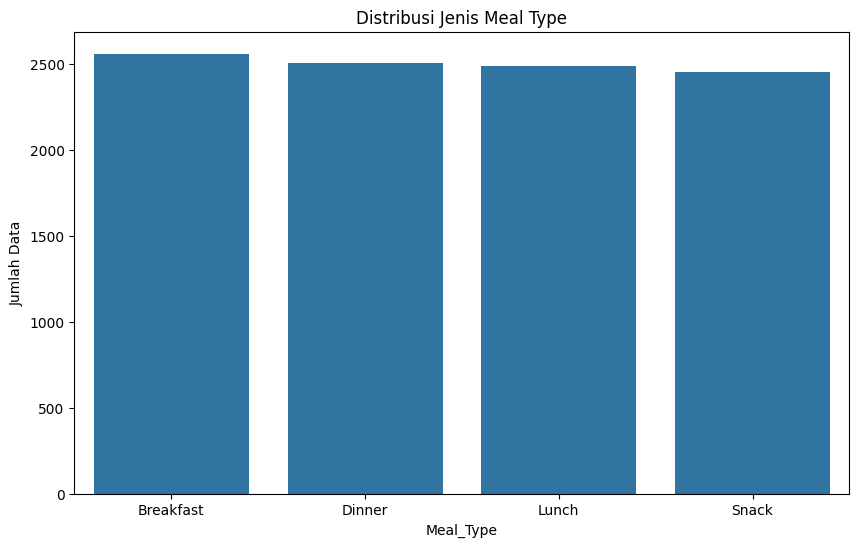

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Meal_Type', order=df['Meal_Type'].value_counts().index)
plt.title('Distribusi Jenis Meal Type')
plt.ylabel('Jumlah Data')
plt.show()

**📌 Insights:**
- 🍳 **Breakfast (2.559 data)**  
  Jumlah data terbanyak, menandakan sarapan merupakan waktu makan yang paling sering dicatat oleh pengguna.

- 🍛 **Lunch (2.487 data)**  
  Distribusinya hampir setara dengan sarapan, menunjukkan makan siang juga konsisten terdokumentasi.

- 🍽️ **Dinner (2.503 data)**  
  Jumlah yang tinggi menandakan makan malam juga merupakan waktu makan yang cukup rutin dicatat.

- 🍪 **Snack (2.451 data)**  
  Meskipun bukan meal utama, snack memiliki jumlah data yang signifikan dan tidak bisa diabaikan dalam sistem rekomendasi.


### **Sumber Data**

**Source:  https://www.kaggle.com/datasets/adilshamim8/daily-food-and-nutrition-dataset**

### **Uraian Feature Data**

Dataset ini terdiri dari 14 kolom yang merepresentasikan informasi makanan harian dan nilai nutrisinya. Berikut adalah deskripsi masing-masing fitur:

| Fitur | Tipe | Deskripsi |
|-------|------|-----------|
| `Date` | object (datetime) | Tanggal konsumsi makanan (format: YYYY-MM-DD) |
| `User_ID` | int | ID unik pengguna yang mengonsumsi makanan tersebut |
| `Food_Item` | object | Nama makanan yang dikonsumsi (contoh: Apple, Chicken Breast) |
| `Category` | object | Kategori makanan (contoh: Fruits, Meat, Dairy) |
| `Calories (kcal)` | int | Total energi dari makanan, dalam kilokalori |
| `Protein (g)` | float | Jumlah protein dalam gram |
| `Carbohydrates (g)` | float | Jumlah total karbohidrat dalam gram |
| `Fat (g)` | float | Jumlah total lemak dalam gram |
| `Fiber (g)` | float | Kandungan serat dalam gram |
| `Sugars (g)` | float | Kandungan gula dalam gram |
| `Sodium (mg)` | int | Kandungan natrium dalam miligram |
| `Cholesterol (mg)` | int | Kandungan kolesterol dalam miligram |
| `Meal_Type` | object | Jenis waktu makan (contoh: Breakfast, Lunch, Dinner, Snack) |
| `Water_Intake (ml)` | int | Jumlah air yang diminum saat makan, dalam mililiter |

Fitur-fitur nutrisi seperti `Calories`, `Protein`, `Fat`, dll digunakan untuk membangun model content-based dan mengenali pola kesukaan pada collaborative-based.

## **Data Preparation**

### **🔧 Teknik yang Digunakan:**

- **Membuat Salinan Dataset dan Labelisasi Encoding untuk `Meal_Type`**  
  Membuat salinan dataset dan kemudian mengubah nilai kategori seperti 'Breakfast', 'Lunch', dll menjadi angka agar dapat digunakan dalam algoritma machine learning.

- **Normalisasi pada fitur numerik**  
  Menstandarisasi skala fitur nutrisi (kalori, protein, lemak, dll) untuk menghindari dominasi fitur tertentu dalam model.

- **Filtering user dengan jumlah konsumsi cukup**  
  Memastikan hanya pengguna dengan riwayat konsumsi yang cukup digunakan dalam model collaborative filtering, agar hasil rekomendasi lebih relevan dan berbobot.

- **Membuat vektor fitur nutrisi untuk makanan**  
  Menyusun representasi vektor berdasarkan kandungan nutrisi dari setiap makanan yang akan digunakan dalam content-based filtering.

- **Membangun user-item matrix**  
  Matriks ini diperlukan untuk collaborative filtering dengan KNN, yang menunjukkan seberapa sering seorang pengguna mengonsumsi suatu makanan.

- **Split data untuk training dan testing**  
  Dataset dibagi menjadi data latih dan data uji agar model dapat dievaluasi secara adil dan tidak overfitting.

- **Memilih dan Membuat Data Konsumsi User**  
  Seorang user akan dipilih dan dibuat data konsumsinya sebagai target evaluasi.

- **Menyiapkan Salinan Matrix dan Konversi ke Sparse**  
  Menyalin matrix untuk menyisakan item latih dan konversi ke bentuk sparse

- **Mendaftarkan Fitur Nutrisi untuk Prediksi**  
  Mendefinisikan daftar fitur yang relevan (seperti kalori, protein, karbohidrat, dll) yang akan digunakan dalam proses prediksi jenis waktu makan dan sistem rekomendasi.

### **🗒️ Penjelasan Tahapan Proses & Alasan**

1. **Menyalin Dataset dan Encoding `Meal_Type`**
   - Menyalin dataset untuk modeling
   - Logistic Regression sebagai model klasifikasi membutuhkan label numerik.
   - Encoding menjembatani data kategorikal ke bentuk yang dapat dihitung.

2. **Normalisasi Fitur Numerik**
   - Menghindari dominasi fitur dengan skala besar (seperti `Calories` atau `Sodium`) agar semua fitur berkontribusi seimbang ke model.

3. **Filtering User**
   - Collaborative filtering membutuhkan cukup data untuk mengidentifikasi pola konsumsi yang bermakna.

4. **Vektorisasi Fitur Nutrisi**
   - Dibutuhkan untuk menghitung kemiripan antar makanan pada content-based filtering.

5. **User-Item Matrix**
   - Matriks ini menjadi representasi interaksi pengguna dan makanan untuk KNN.

6. **Train-Test Split**
   - Agar model dapat diuji secara objektif sebelum diterapkan ke data aktual.

7. **Memilih dan Membuat Data Konsumsi User**
  - Seorang user akan dipilih agar dapat dievaluasi dan diberikan rekomendasi yang relevan.

8. **Menyiapkan Salinan Matrix dan Konversi ke Sparse**
  - Salinan matrix diperlukan untuk memastikan hanya item latih yang dipertimbangkan saat membangun model, sementara konversi ke sparse matrix dilakukan untuk menghemat memori dan mempercepat proses komputasi KNN pada data berdimensi tinggi

8. **Mendaftarkan Fitur Nutrisi**
   - Proses ini penting untuk menyatukan pemilihan fitur dalam satu variabel agar konsisten digunakan di seluruh pipeline modeling dan sistem rekomendasi.

### **🔤 Menyalin Dataset dan Labelisasi Encoding untuk Meal_Type**

In [43]:
# Salin dataset untuk keperluan modeling
df_model = df.copy()

# Label Encoding pada Meal_Type
le = LabelEncoder()
df_model['Meal_Type_Label'] = le.fit_transform(df_model['Meal_Type'])

# Menampilkan hasil encode pertama kali
df_model[['Meal_Type', 'Meal_Type_Label']].drop_duplicates().sort_values('Meal_Type_Label')

,Meal_Type,Meal_Type_Label
2,Breakfast,0
5,Dinner,1
0,Lunch,2
3,Snack,3


**📌 Insights:**
- `Meal_Type` berhasil dikonversi ke label numerik agar bisa digunakan sebagai target dalam model klasifikasi.
- Hasil encoding:
  - **Breakfast** → `0`
  - **Dinner** → `1`
  - **Lunch** → `2`
  - **Snack** → `3`
- Konversi ini memungkinkan algoritma supervised seperti **Logistic Regression** memahami label meal type dalam bentuk numerik.

### **⚖️ Normalisasi pada Fitur Numerik**

In [44]:
# Normalisasi fitur numerik
numeric_features = [
    'Calories (kcal)', 'Protein (g)', 'Carbohydrates (g)', 'Fat (g)',
    'Fiber (g)', 'Sugars (g)', 'Sodium (mg)', 'Cholesterol (mg)', 'Water_Intake (ml)'
]
scaler = MinMaxScaler()
df_model[numeric_features] = scaler.fit_transform(df_model[numeric_features])

# Tampilkan beberapa data hasil normalisasi
df_model[numeric_features].head()

,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Water_Intake (ml)
0,0.223636,0.844898,0.828421,0.010204,0.15,0.254,0.752,0.416667,0.420000
1,0.029091,0.779592,0.092632,0.044898,0.26,0.244,0.680,0.323333,0.406667
2,0.320000,0.532653,0.780000,0.506122,0.32,0.894,0.295,0.523333,0.594444
3,0.120000,0.865306,0.443158,0.308163,0.65,0.882,0.307,0.043333,0.310000
4,0.818182,0.671429,0.745263,0.938776,0.78,0.388,0.358,0.493333,0.412222


**📌 Insights:**
- Semua fitur numerik seperti `Calories`, `Protein`, `Fat`, dan lainnya telah dinormalisasi ke rentang **[0, 1]** menggunakan **Min-Max Scaler**.
- Normalisasi ini penting karena:
  - Menghindari dominasi fitur dengan skala besar seperti `Sodium (mg)` atau `Cholesterol (mg)`.
  - Meningkatkan performa model seperti **KNN** yang berbasis jarak dan **Logistic Regression** yang sensitif terhadap skala fitur.
- Dataset sekarang lebih siap untuk digunakan dalam proses modeling dan training.

### **🧑‍⚖️ Filtering User dengan Jumlah Konsumsi Cukup**

In [45]:
# Filter hanya user dengan >=10 entri
user_counts = df_model['User_ID'].value_counts()
valid_users = user_counts[user_counts >= 10].index
df_filtered = df_model[df_model['User_ID'].isin(valid_users)]

# Cek hasil filtering
print(f"Jumlah user sebelum filtering: {df_model['User_ID'].nunique()}")
print(f"Jumlah user setelah filtering: {df_filtered['User_ID'].nunique()}")
print(f"Total entri setelah filtering: {df_filtered.shape[0]}")
df_filtered.head()

Jumlah user sebelum filtering: 1000
Jumlah user setelah filtering: 528
Total entri setelah filtering: 6579


,Date,User_ID,Food_Item,Category,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Meal_Type,Water_Intake (ml),Meal_Type_Label
0,2024-09-11,496,Eggs,Meat,0.223636,0.844898,0.828421,0.010204,0.15,0.254,0.752,0.416667,Lunch,0.420000,2
3,2024-08-27,112,Banana,Fruits,0.120000,0.865306,0.443158,0.308163,0.65,0.882,0.307,0.043333,Snack,0.310000,3
6,2024-07-27,714,Carrot,Vegetables,0.160000,0.555102,0.077895,0.391837,0.28,0.756,0.933,0.050000,Dinner,0.703333,1
11,2024-07-13,621,Tomato,Vegetables,0.121818,0.681633,0.168421,0.185714,0.91,0.370,0.066,0.600000,Dinner,0.776667,1
19,2024-12-16,660,Eggs,Meat,0.943636,0.067347,0.191579,0.630612,0.95,0.564,0.373,0.056667,Breakfast,0.351111,0


**📌 Insights:**
- 📉 **Reduksi Jumlah User**: Dari 1.000 pengguna, hanya 528 pengguna yang memiliki catatan konsumsi ≥ 10 entri.
- 🧼 **Pembersihan Noise**: Pengguna dengan data sangat sedikit dikeluarkan untuk menjaga kualitas model.
- 🧠 **Fokus pada User Aktif**: Total entri menyusut dari 10.000 menjadi 6.579 data yang lebih representatif dan stabil untuk Collaborative Filtering.
- 📊 **Kualitas Data Meningkat**: Dataset hasil filtering lebih cocok untuk mengenali pola konsumsi dan preferensi dengan model KNN.

### **🧪 Vektorisasi Fitur Nutrisi**

In [46]:
# Siapkan food_vectors untuk content-based filtering
food_vectors = df_filtered[['Food_Item'] + numeric_features]
food_vectors = food_vectors.groupby('Food_Item').mean().reset_index()

# Tampilkan 5 data pertama
food_vectors.head()

,Food_Item,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Water_Intake (ml)
0,Apple,0.506555,0.503590,0.510845,0.522983,0.477949,0.511487,0.489585,0.474991,0.488051
1,Banana,0.513845,0.504634,0.513520,0.506792,0.473229,0.476052,0.483479,0.515104,0.507922
2,Beef Steak,0.479648,0.503732,0.486054,0.480550,0.457403,0.498254,0.488762,0.506335,0.496532
3,Bread,0.520898,0.504922,0.498347,0.515162,0.484706,0.471729,0.509418,0.513745,0.520987
4,Broccoli,0.515966,0.488223,0.505181,0.525638,0.512552,0.479583,0.516208,0.491649,0.519282


**📌 Insights:**
- **Rata-rata fitur nutrisi dihitung per makanan unik (`Food_Item`)**  
  Hal ini memungkinkan model mengenali profil kandungan gizi dari setiap makanan berdasarkan nilai rata-ratanya.

- **Setiap makanan direpresentasikan sebagai vektor numerik berdimensi 9**  
  Vektor ini terdiri atas nilai normalisasi dari kalori, protein, karbohidrat, lemak, serat, gula, sodium, kolesterol, dan air. Vektor ini menjadi dasar dalam content-based filtering.

- **Hasilnya adalah dataset unik sebanyak jumlah makanan**  
  Setiap makanan hanya muncul satu kali dengan nilai nutrisi rata-rata dari semua konsumsi.

### **👤 Menyiapkan user-item Matrix**

In [47]:
# Siapkan user-item matrix untuk collaborative filtering
user_item_matrix = df_filtered.pivot_table(
    index='User_ID',
    columns='Food_Item',
    aggfunc='size',
    fill_value=0
)
user_item_sparse = csr_matrix(user_item_matrix.values)

### **🔪 Split Dataset (Pembagian data uji dan latih)**

In [48]:
# Siapkan data training untuk Logistic Regression
X = df_filtered[numeric_features]
y = df_filtered['Meal_Type_Label']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Siapkan data untuk KNN

# Split data konsumsi user menjadi train/test
split_ratio = 0.7
split_index = int(split_ratio * num_items)
train_items = set(user_consumed[:split_index])
test_items = set(user_consumed[split_index:])

### **⛳ Memilih dan Membuat Data Konsumsi User**

In [49]:
# Pilih satu user untuk evaluasi (misalnya User_ID = 23)
target_user_id = 23

# Buat data konsumsi untuk user ini
user_consumed = df_filtered[df_filtered['User_ID'] == target_user_id]['Food_Item'].unique()
num_items = len(user_consumed)

### **🔄️ Menyiapkan Salinan Matrix dan Konversi ke Sparse**

In [50]:
# Buat salinan matrix hanya menyisakan item latih
user_item_matrix_train = user_item_matrix.copy()
for item in user_item_matrix.columns:
    if item not in train_items:
        user_item_matrix_train.loc[:, item] = 0

# Konversi ke bentuk sparse
user_item_sparse_train = csr_matrix(user_item_matrix_train.values)

### **🥪 Mendaftarkan Fitur Nutrisi untuk Prediksi**

In [51]:
# Daftar fitur nutrisi yang digunakan dalam prediksi
nutrient_features = [
    'Calories (kcal)', 'Protein (g)', 'Carbohydrates (g)', 'Fat (g)',
    'Fiber (g)', 'Sugars (g)', 'Sodium (mg)', 'Cholesterol (mg)', 'Water_Intake (ml)'
]

## **⚙️ Modelling & Result**


### 🎯 Solusi Permasalahan melalui Sistem Rekomendasi

Permasalahan utama yang diidentifikasi dalam proyek ini adalah bagaimana memberikan **rekomendasi makanan yang sesuai dengan waktu makan (Meal Type)** sekaligus menjaga **keseimbangan nutrisi harian** bagi pengguna. Tantangan tersebut diperumit oleh fakta bahwa setiap pengguna memiliki **preferensi konsumsi berbeda**, serta kebutuhan gizi yang dapat bervariasi tergantung waktu makan, aktivitas, dan tujuan kesehatan.

Untuk menjawab permasalahan tersebut, sistem rekomendasi dirancang dengan dua pendekatan utama:

1. **Content-Based Filtering**: Menggunakan informasi kandungan nutrisi pada makanan untuk memprediksi kecocokan makanan terhadap waktu makan tertentu (*Meal Type Classification*). Pendekatan ini berfokus pada **karakteristik intrinsik makanan**.

2. **Collaborative Filtering**: Mengandalkan riwayat konsumsi pengguna-pengguna lain yang serupa untuk menyarankan makanan baru. Dengan melihat pola konsumsi kolektif, pendekatan ini mampu memberikan **rekomendasi yang lebih personal**.

Dengan menggabungkan kedua pendekatan ini, sistem diharapkan mampu:
- Memberikan rekomendasi makanan yang sesuai dengan **konteks waktu makan**.
- Menyediakan **variasi makanan sehat** berdasarkan preferensi dan kebiasaan pengguna.
- Membantu pengguna mencapai **asupan gizi yang lebih seimbang** dalam rutinitas makan sehari-hari.

Pendekatan ini bukan hanya menyelesaikan masalah keterbatasan informasi (dari sisi pengguna maupun makanan), tetapi juga meningkatkan **relevansi** dan **kualitas rekomendasi** yang diberikan.

### 🔍 Pertimbangan Pemilihan Algoritma: Kelebihan dan Kekurangan

Dalam membangun sistem rekomendasi makanan berbasis waktu makan (*Meal Type*), dua pendekatan algoritma yang dipertimbangkan adalah **Logistic Regression** dan **K-Nearest Neighbors (KNN)**. Berikut adalah analisis kelebihan dan kekurangan masing-masing secara umum:

>---

#### 🧠 Logistic Regression (Content-Based Filtering)

**Kelebihan:**
- 📊 **Sederhana dan cepat dilatih**: Logistic Regression mudah diimplementasikan dan efisien secara komputasi.
- 🧠 **Interpretatif**: Model ini memberikan wawasan yang jelas terhadap fitur-fitur penting (seperti nutrisi) dalam menentukan meal type.
- 🌐 **Bekerja tanpa data pengguna lain**: Cocok untuk skenario di mana hanya data makanan (dan nutrisinya) yang tersedia.

**Kekurangan:**
- 🎯 **Kurang personalisasi**: Tidak mempertimbangkan preferensi pengguna; semua orang menerima rekomendasi serupa untuk makanan dengan profil nutrisi yang sama.
- 🧪 **Tergantung kualitas fitur**: Performa sangat bergantung pada representasi fitur makanan (misalnya, nutrisi harus lengkap dan relevan).

>---

#### 👥 K-Nearest Neighbors (Collaborative Filtering)

**Kelebihan:**
- 🤝 **Rekomendasi terpersonalisasi**: Menggunakan kesamaan antar pengguna untuk menyarankan makanan yang relevan secara sosial.
- 🔄 **Mudah diperbarui**: Dapat memberikan rekomendasi secara langsung dari data konsumsi terbaru tanpa pelatihan ulang.
- 🧩 **Tidak memerlukan informasi nutrisi**: Bisa bekerja hanya dengan data interaksi (user–item), meski tidak ada deskripsi fitur makanan.

**Kekurangan:**
- 🧊 **Cold Start Problem**: Tidak efektif untuk pengguna baru atau makanan baru yang belum memiliki cukup data interaksi.
- 🐢 **Kurang efisien di dataset besar**: Proses pencarian tetangga terdekat menjadi mahal secara komputasi saat skala data besar.
- 🎯 **Bias terhadap popularitas**: Cenderung merekomendasikan makanan yang populer secara umum, bukan yang paling relevan secara personal atau kontekstual.

>---

### **🚂 Logistic Regression (Content-based Filtering)**

Pendekatan ini menggunakan algoritma klasifikasi Logistic Regression untuk memprediksi jenis waktu makan (`Meal_Type`) dari sebuah makanan berdasarkan profil nutrisinya. Model ini akan belajar dari vektor nutrisi makanan yang telah dinormalisasi untuk mengklasifikasikan apakah makanan tersebut cocok untuk Breakfast, Lunch, Dinner, atau Snack.

In [52]:
# Pipeline klasifikasi Logistic Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    ('select', SelectKBest(score_func=f_classif, k=15)),
    ('logreg', LogisticRegression(
        solver='lbfgs',
        max_iter=2000,
        class_weight='balanced',
        C=0.01,
        penalty='l2',
        random_state=42
    ))
])

# Latih model dan evaluasi
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Akurasi: 0.2750759878419453

Classification Report:
               precision    recall  f1-score   support

           0       0.28      0.33      0.30       331
           1       0.29      0.29      0.29       332
           2       0.27      0.21      0.23       325
           3       0.26      0.27      0.27       328

    accuracy                           0.28      1316
   macro avg       0.27      0.27      0.27      1316
weighted avg       0.27      0.28      0.27      1316



**📌 Insights:**
- **Akurasi model sebesar 27.5%** menunjukkan bahwa model dapat memprediksi tipe waktu makan dengan tingkat keberhasilan yang masih terbatas.
- **Kelas 0 (Breakfast)** memiliki **f1-score tertinggi (0.30)** dengan recall 33%, menunjukkan bahwa model sedikit lebih baik mengenali pola konsumsi sarapan.
- **Kelas 2 (Lunch)** memiliki f1-score terendah (0.23), yang mengindikasikan tantangan dalam membedakan makanan siang dari waktu makan lain berdasarkan nutrisi saja.
- **Penerapan Polynomial Features dengan interaksi & seleksi fitur (SelectKBest)** membantu sedikit meningkatkan kinerja model dibanding baseline awal.
- **Class imbalance masih menjadi tantangan** meskipun sudah diterapkan `class_weight='balanced'`. Potensi peningkatan lebih lanjut dapat dicapai melalui teknik oversampling/undersampling atau penggunaan model lain (misalnya boosting).

🔧 *Model Logistic Regression tetap dipilih karena interpretabilitas tinggi dan stabilitas performa meskipun akurasi belum optimal.*

### **🧭 KNN (Collaborative Filtering)**

In [53]:
# Inisialisasi dan latih model KNN
knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_model.fit(user_item_sparse_train)

# Evaluasi semua user
K = 10
results = []

for user_id in user_item_matrix_train.index:
    # Tentukan user index
    user_index = user_item_matrix_train.index.get_loc(user_id)

    # Cari user-user mirip
    distances, indices = knn_model.kneighbors(
        user_item_sparse_train[user_index], n_neighbors=6
    )

    # Ambil user-user mirip (tanpa user itu sendiri)
    similar_users_ids = [user_item_matrix_train.index[i] for i in indices.flatten()[1:]]
    foods_from_similars_df = df_filtered[df_filtered['User_ID'].isin(similar_users_ids)][['Food_Item']]

    # Ambil item yang sudah dikonsumsi user (train)
    train_items_user = df_filtered[
        (df_filtered['User_ID'] == user_id) &
        (df_filtered['Food_Item'].isin(train_items))
    ]['Food_Item'].unique()

    # Ambil item dari test set user (ground truth)
    test_items_user = df_filtered[
        (df_filtered['User_ID'] == user_id) &
        (df_filtered['Food_Item'].isin(test_items))
    ]['Food_Item'].unique()

    # Filter makanan baru (belum dikonsumsi)
    mask_new_foods = ~foods_from_similars_df['Food_Item'].isin(train_items_user)
    recommended_foods = foods_from_similars_df[mask_new_foods]['Food_Item'].value_counts().head(K).index.tolist()

    # Evaluasi
    recommended_set = set(recommended_foods)
    true_positives = recommended_set.intersection(test_items_user)

    precision = len(true_positives) / K
    recall = len(true_positives) / len(test_items_user) if len(test_items_user) > 0 else 0

    results.append({
        'User_ID': user_id,
        'Precision@10': precision,
        'Recall@10': recall
    })

# Buat dataframe hasil evaluasi
eval_df = pd.DataFrame(results)

# Tampilkan Top 5 berdasarkan Precision@10 dan Recall@10
top5_precision = eval_df.sort_values(by='Precision@10', ascending=False).head(5)
top5_recall = eval_df.sort_values(by='Recall@10', ascending=False).head(5)

print("🏆 Top 5 Users by Precision@10")
display(top5_precision.reset_index(drop=True))

print("📈 Top 5 Users by Recall@10")
display(top5_recall.reset_index(drop=True))

🏆 Top 5 Users by Precision@10


,User_ID,Precision@10,Recall@10
0,20,0.3,1.0
1,477,0.3,1.0
2,56,0.2,1.0
3,948,0.2,1.0
4,103,0.2,1.0


📈 Top 5 Users by Recall@10


,User_ID,Precision@10,Recall@10
0,959,0.1,1.0
1,957,0.1,1.0
2,56,0.2,1.0
3,941,0.1,1.0
4,948,0.2,1.0


**📌 Insights:**

- **User Target**: Sistem rekomendasi memanfaatkan pola konsumsi makanan dari pengguna-pengguna lain yang memiliki kebiasaan serupa untuk memberikan saran makanan baru kepada *User 23*.

- **Metode Evaluasi**: Performa sistem dievaluasi menggunakan metrik:
  - **Precision@10**: Mengukur ketepatan rekomendasi.
  - **Recall@10**: Mengukur kelengkapan rekomendasi terhadap kebutuhan aktual pengguna.

- **Hasil Evaluasi (User 23)**:
  - ✅ **Precision@10**: 0.1000 → Dari 10 makanan yang direkomendasikan, hanya 1 yang benar-benar dikonsumsi user dalam data uji.
  - ✅ **Recall@10**: 0.3333 → Dari seluruh makanan yang dikonsumsi user dalam data uji, sepertiga berhasil direkomendasikan oleh sistem.

- **Top Performers**:
  - 🏆 **Top 5 Users by Precision@10**:
    - User 20 & 477 memiliki Precision@10 = 0.30, artinya 3 dari 10 makanan yang direkomendasikan benar-benar relevan.
  - 📈 **Top 5 Users by Recall@10**:
    - Beberapa pengguna seperti User 959 dan 957 memiliki Recall@10 = 1.00, menunjukkan sistem mampu menangkap seluruh kebutuhan makanan relevan mereka.

- **Interpretasi**:
  - Nilai *Recall@10* yang tinggi menunjukkan sistem cukup mampu memahami kebutuhan makanan pengguna serupa.
  - Namun, nilai *Precision@10* yang masih rendah pada sebagian besar user menunjukkan potensi peningkatan kualitas rekomendasi, terutama dalam penyaringan makanan yang benar-benar relevan.
  - Pendekatan *Collaborative Filtering* ini berhasil memberikan rekomendasi yang **bersifat personalized**, dan hasil evaluasi kuantitatif ini membuka peluang untuk **kombinasi dengan pendekatan lain (misal: Content-Based)** agar sistem menjadi lebih akurat dan kontekstual.

### **🔝 Top 10 Reccomendation**

#### **🚂 Logistic Regression (Content-based Filtering)**

Pendekatan ini memprediksi label `Meal_Type` dari makanan berdasarkan kandungan nutrisinya.

In [54]:
# Prediksi meal type dari semua item makanan unik
unique_foods = df_filtered[['Food_Item'] + nutrient_features].drop_duplicates('Food_Item')
X_food = unique_foods[nutrient_features]

# Gunakan pipeline logistic regression yang sudah dilatih sebelumnya
meal_type_preds = pipeline.predict(X_food)

# Tambahkan hasil prediksi ke dataframe
unique_foods['Predicted_Meal_Type'] = meal_type_preds

# Mapping label ke nama meal type
meal_type_mapping = {
    0: 'Breakfast',
    1: 'Lunch',
    2: 'Dinner',
    3: 'Snack'
}
unique_foods['Predicted_Meal_Type'] = unique_foods['Predicted_Meal_Type'].map(meal_type_mapping)

# Tampilkan 10 makanan teratas untuk masing-masing meal type
for meal in unique_foods['Predicted_Meal_Type'].unique():
    print(f"\n🍽️ Top Recommendations for {meal}:")
    top_items = unique_foods[unique_foods['Predicted_Meal_Type'] == meal].head(10)
    display(top_items[['Food_Item'] + nutrient_features])


🍽️ Top Recommendations for Snack:


,Food_Item,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Water_Intake (ml)
0,Eggs,0.223636,0.844898,0.828421,0.010204,0.15,0.254,0.752,0.416667,0.420000
3,Banana,0.120000,0.865306,0.443158,0.308163,0.65,0.882,0.307,0.043333,0.310000
11,Tomato,0.121818,0.681633,0.168421,0.185714,0.91,0.370,0.066,0.600000,0.776667
21,Oats,0.803636,0.648980,0.430526,0.540816,0.75,0.102,0.435,0.233333,0.172222
36,Butter,0.703636,0.820408,0.702105,0.102041,0.78,0.296,0.893,0.026667,0.627778
41,Broccoli,0.307273,0.644898,0.468421,0.597959,0.94,0.470,0.771,0.460000,0.625556
42,Water,0.220000,0.946939,0.792632,0.185714,0.90,0.886,0.525,0.880000,0.983333
44,Beef Steak,0.065455,0.973469,0.504211,0.169388,0.59,0.104,0.888,0.720000,0.862222
72,Spinach,0.421818,0.224490,0.515789,0.114286,0.22,0.588,0.198,0.270000,0.257778



🍽️ Top Recommendations for Breakfast:


,Food_Item,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Water_Intake (ml)
6,Carrot,0.160000,0.555102,0.077895,0.391837,0.28,0.756,0.933,0.050000,0.703333
26,Strawberry,0.165455,0.367347,0.929474,0.220408,0.57,0.400,0.970,0.876667,0.963333
37,Quinoa,0.263636,0.897959,0.377895,0.624490,0.88,0.016,0.372,0.613333,0.803333
39,Apple,0.401818,0.259184,0.889474,0.669388,0.80,0.078,0.509,0.963333,0.697778
48,Grapes,0.443636,0.420408,0.977895,0.459184,0.81,0.910,0.934,0.013333,0.582222
50,Nuts,0.256364,0.567347,0.364211,0.802041,0.65,0.478,0.842,0.940000,0.892222
79,Potato,0.201818,0.600000,0.713684,0.620408,0.73,0.768,0.934,0.206667,0.521111
98,Cookies,0.345455,0.416327,0.768421,0.269388,0.90,0.022,0.017,0.810000,0.252222
367,Chips,0.834545,0.157143,0.888421,0.920408,0.31,0.912,0.542,0.673333,0.357778



🍽️ Top Recommendations for Dinner:


,Food_Item,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Water_Intake (ml)
20,Pasta,0.303636,0.553061,0.034737,0.773469,0.37,0.864,0.653,0.586667,0.137778
35,Yogurt,0.941818,0.540816,0.614737,0.497959,0.16,0.190,0.360,0.066667,0.918889
45,Paneer,0.223636,0.430612,0.572632,0.593878,0.52,0.248,0.424,0.033333,0.984444
91,Milkshake,0.830909,0.963265,0.785263,0.295918,0.95,0.170,0.530,0.976667,0.228889
94,Green Tea,0.681818,0.451020,0.272632,0.167347,0.82,0.728,0.201,0.483333,0.001111
196,Orange Juice,0.038182,0.116327,0.894737,0.616327,0.26,0.440,0.372,0.073333,0.635556



🍽️ Top Recommendations for Lunch:


,Food_Item,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Water_Intake (ml)
22,Orange,0.312727,0.410204,0.842105,0.900000,0.17,0.936,0.422,0.866667,0.862222
25,Cheese,0.367273,0.346939,0.209474,0.612245,0.82,0.872,0.744,0.366667,0.160000
47,Salmon,0.832727,0.087755,0.688421,0.802041,0.61,0.944,0.423,0.766667,0.411111
56,Pork Chop,0.725455,0.883673,0.749474,0.791837,0.55,0.102,0.828,0.770000,0.075556
58,Chicken Breast,0.427273,0.263265,0.433684,0.628571,0.88,0.576,0.764,0.343333,0.174444
60,Coffee,0.789091,0.585714,0.686316,0.753061,0.86,0.654,0.569,0.586667,0.187778
101,Bread,0.758182,0.071429,0.952632,0.989796,0.89,0.578,0.577,0.910000,0.878889
106,Milk,0.336364,0.232653,0.823158,0.946939,0.66,0.660,0.468,0.123333,0.314444
139,Chocolate,0.520000,0.812245,0.695789,0.936735,0.35,0.742,0.646,0.143333,0.338889
146,Rice,0.430909,0.024490,0.913684,0.622449,0.91,0.538,0.592,0.833333,0.260000


**📌 Insights:**
- ⚙️ **Model memanfaatkan kandungan nutrisi sebagai fitur prediktor**  
  Logistic Regression digunakan untuk memprediksi waktu makan (Meal Type) berdasarkan fitur seperti kalori, protein, lemak, serat, gula, natrium, kolesterol, dan asupan air.

- 🍽️ **Setiap prediksi dikelompokkan ke dalam 4 Meal Type utama**  
  Hasil klasifikasi mengelompokkan makanan ke dalam kategori: Breakfast, Lunch, Dinner, dan Snack.

- 🍓 **Meal Type "Breakfast" didominasi makanan ringan & bernutrisi tinggi air**  
  Makanan seperti 🥕 Carrot, 🍓 Strawberry, 🍎 Apple, dan 🍇 Grapes memiliki kadar air tinggi dan karbohidrat sedang, cocok untuk energi awal hari.

- 🍛 **"Lunch" diprediksi mencakup makanan dengan kalori dan lemak lebih tinggi**  
  Makanan seperti 🍚 Rice, 🧀 Cheese, dan 🍫 Chocolate masuk kategori ini, memperlihatkan pola makan siang yang lebih berat dan mengenyangkan.

- 🌙 **"Dinner" menampilkan makanan dengan keseimbangan nutrisi**  
  Seperti 🍝 Pasta, 🧊 Yogurt, dan 🧃 Orange Juice, cenderung ringan namun tetap kaya akan protein, lemak sehat, dan cairan.

- 🍪 **"Snack" berisi campuran makanan manis & tinggi protein**  
  Misalnya 🍌 Banana, 🥦 Broccoli, 🥚 Eggs, dan 🍪 Cookies, yang cocok dikonsumsi di sela waktu makan utama untuk energi tambahan.

- 📊 **Distribusi prediksi menunjukkan kemampuan model mengidentifikasi pola dari kandungan nutrisi**  
  Misalnya, makanan tinggi gula dan karbohidrat cenderung diklasifikasikan ke Snack, sementara makanan tinggi air dan rendah kalori banyak dikaitkan dengan Breakfast.

#### **🧭 KNN (Collaborative Filtering)**

Menemukan makanan dari user mirip yang belum pernah dikonsumsi oleh user target.

In [55]:
# Cari ulang user serupa
target_user_index = user_item_matrix_train.index.get_loc(target_user_id)
distances, indices = knn_model.kneighbors(
    user_item_sparse_train[target_user_index], n_neighbors=6
)

# 🔍 Tampilkan makanan latih (train) yang dikonsumsi oleh user target
print(f"📋 Makanan latih (train) yang dikonsumsi oleh User {target_user_id}:\n")
user_foods_df = df_filtered[
    (df_filtered['User_ID'] == target_user_id) &
    (df_filtered['Food_Item'].isin(train_items))
][['Food_Item', 'Meal_Type']]
display(user_foods_df.drop_duplicates())

# Ambil item dari user serupa
similar_users_ids = [user_item_matrix_train.index[i] for i in indices.flatten()[1:]]
foods_from_similars_df = df_filtered[df_filtered['User_ID'].isin(similar_users_ids)][['Food_Item', 'Meal_Type']]

# Filter makanan baru
mask_new_foods = ~foods_from_similars_df['Food_Item'].isin(train_items)
recommended_foods_df = foods_from_similars_df[mask_new_foods]

# Ambil Top 10 rekomendasi
top10_counts = recommended_foods_df['Food_Item'].value_counts().head(10)
top10_foods = top10_counts.index.tolist()

# Kelompokkan berdasarkan Meal_Type
top10_df = recommended_foods_df[recommended_foods_df['Food_Item'].isin(top10_foods)]
top10_grouped = top10_df.drop_duplicates().groupby('Meal_Type')['Food_Item'].apply(list)

# 🎯 Tampilkan hasil rekomendasi
print(f"\n🎯 Top {len(top10_foods)} Personalized Recommendations for User {target_user_id} (KNN-Based, Grouped by Meal Type):\n")
for meal_type, foods in top10_grouped.items():
    print(f"🍽️ {meal_type}:")
    for i, food in enumerate(foods, start=1):
        count = top10_counts[food]
        print(f"   {i}. {food} (seen {count}x among similar users)")

# Evaluasi ulang (untuk tampil bersama)
recommended_set = set(top10_foods)
true_positives = recommended_set.intersection(test_items)
precision_at_k = len(true_positives) / K
recall_at_k = len(true_positives) / len(test_items) if test_items else 0

print(f"\n📊 Evaluation Metrics for User {target_user_id}:")
print(f"✅ Precision@{K}: {precision_at_k:.4f}")
print(f"✅ Recall@{K}: {recall_at_k:.4f}")

📋 Makanan latih (train) yang dikonsumsi oleh User 23:



,Food_Item,Meal_Type
44,Beef Steak,Snack
906,Pork Chop,Dinner
1901,Broccoli,Dinner
2492,Quinoa,Lunch
2670,Cookies,Snack
3627,Pasta,Lunch
3811,Beef Steak,Breakfast
4683,Yogurt,Snack



🎯 Top 10 Personalized Recommendations for User 23 (KNN-Based, Grouped by Meal Type):

🍽️ Breakfast:
   1. Butter (seen 5x among similar users)
   2. Tomato (seen 2x among similar users)
   3. Coffee (seen 3x among similar users)
   4. Water (seen 3x among similar users)
   5. Nuts (seen 2x among similar users)
   6. Carrot (seen 2x among similar users)
   7. Chocolate (seen 2x among similar users)
🍽️ Dinner:
   1. Green Tea (seen 3x among similar users)
   2. Chips (seen 6x among similar users)
   3. Water (seen 3x among similar users)
   4. Butter (seen 5x among similar users)
   5. Oats (seen 3x among similar users)
🍽️ Lunch:
   1. Green Tea (seen 3x among similar users)
   2. Oats (seen 3x among similar users)
   3. Chips (seen 6x among similar users)
   4. Butter (seen 5x among similar users)
   5. Carrot (seen 2x among similar users)
🍽️ Snack:
   1. Nuts (seen 2x among similar users)
   2. Oats (seen 3x among similar users)
   3. Tomato (seen 2x among similar users)
   4. Butter 

**📌 Insights:**

- 👤 **User 23 memiliki pola konsumsi yang beragam dan mencakup semua waktu makan**  
  Riwayat konsumsi menunjukkan preferensi terhadap makanan berat seperti 🥩 *Beef Steak*, 🍝 *Pasta*, 🥦 *Broccoli*, dan 🍪 *Cookies* yang tersebar pada waktu *Breakfast*, *Lunch*, *Dinner*, dan *Snack*.

- 🧠 **Sistem menghasilkan rekomendasi berdasarkan makanan dari user-user serupa**  
  10 makanan yang direkomendasikan merupakan hasil agregasi dari konsumsi pengguna-pengguna serupa, namun belum pernah dikonsumsi oleh User 23. Rekomendasi ini bersifat eksplisit dan diperoleh dari pola ko-konsumsi.

- 🧪 **Evaluasi menggunakan Precision@10 dan Recall@10**  
  - **Precision@10 = 0.1000**: Dari 10 makanan yang direkomendasikan, hanya 1 yang benar-benar relevan (terkait konsumsi aktual user di data uji).
  - **Recall@10 = 0.3333**: Dari seluruh makanan relevan yang mungkin direkomendasikan untuk user ini, 33.33% berhasil terjaring dalam 10 besar rekomendasi.

- 🍽️ **Rekomendasi tersebar pada berbagai Meal Type**  
  Rekomendasi tidak hanya fokus pada satu waktu makan. Contohnya, *Tomato* dan *Grapes* muncul di *Snack* dan *Lunch*, sedangkan *Eggs* di *Lunch* dan *Dinner*. Ini menunjukkan fleksibilitas sistem dalam memahami konteks konsumsi.

- 🍊 **Buah dan sayur mendominasi hasil rekomendasi**  
  Makanan seperti 🍅 *Tomato*, 🍊 *Orange*, 🍇 *Grapes*, dan 🥬 *Spinach* muncul berulang kali, mencerminkan kecenderungan sehat dari preferensi pengguna serupa.

- 🎯 **Rekomendasi bersifat personal dan berbasis kebiasaan nyata**  
  Tidak sekadar memilih makanan populer, sistem menggunakan pendekatan *collaborative filtering* untuk memberikan saran yang lebih kontekstual, berdasarkan pola konsumsi pengguna yang memiliki kesamaan historis dengan User 23.

### **⚖️ Kelebihan dan Kekurangan Pendekatan Modeling**

🚂 Logistic Regression (Content-Based Filtering)
**Kelebihan:**
- 🔍 **Berdasarkan fitur nutrisi aktual**: Pendekatan ini mampu memberikan rekomendasi makanan dengan mempertimbangkan kandungan gizi (kalori, protein, gula, lemak, dsb), sehingga cocok untuk konteks rekomendasi sehat.
- 🧠 **Interpretatif & ringan secara komputasi**: Model Logistic Regression sederhana dan memberikan wawasan langsung terkait faktor-faktor yang mempengaruhi klasifikasi meal type.
- 🌐 **Tidak tergantung pada data pengguna lain**: Rekomendasi bisa diberikan meskipun hanya ada informasi nutrisi makanan, tanpa memerlukan data interaksi pengguna.

**Kekurangan:**
- 🧪 **Akurasi tergantung kelengkapan fitur**: Jika informasi nutrisi tidak lengkap atau tidak representatif, performa model bisa menurun.
- 📦 **Kurang personalisasi**: Tidak mempertimbangkan preferensi individual pengguna; semua orang mendapat rekomendasi yang serupa jika fitur makanannya sama.

>---

🧭 K-Nearest Neighbors (Collaborative Filtering)
**Kelebihan:**
- 👥 **Berbasis pola konsumsi pengguna mirip**: Rekomendasi lebih terpersonalisasi karena mempertimbangkan apa yang disukai oleh pengguna serupa.
- 🔄 **Adaptif terhadap data baru**: Model dapat segera memberikan rekomendasi baru jika ada tambahan data konsumsi pengguna tanpa perlu pelatihan ulang.
- 🧩 **Tidak memerlukan informasi fitur makanan**: Rekomendasi bisa diberikan murni dari pola interaksi (siapa makan apa), cocok untuk kasus data tanpa deskripsi nutrisi.

**Kekurangan:**
- 📉 **Cold Start Problem**: Tidak bisa memberikan rekomendasi jika pengguna baru belum memiliki data konsumsi sebelumnya.
- 🐢 **Komputasi berat pada skala besar**: Pencarian tetangga mirip (similar users) menjadi lambat saat jumlah pengguna dan makanan sangat besar.
- ⚖️ **Bias terhadap makanan populer**: Makanan yang sering dikonsumsi oleh banyak pengguna cenderung lebih sering direkomendasikan, meskipun belum tentu relevan untuk konteks meal type.

>---

## **📊 Evaluation**

### **📃 Metrik Evaluasi yang Digunakan**

Dalam proyek ini, digunakan metrik yang berbeda untuk mengevaluasi performa dua pendekatan sistem rekomendasi:

#### 🔹 Logistic Regression (Content-Based Filtering)
Untuk mengukur performa model klasifikasi waktu makan (*Meal Type Classification*), digunakan empat metrik utama:

- **Accuracy**  
  Mengukur proporsi prediksi yang benar dari keseluruhan data:  
  $$
  \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
  $$

- **Precision**  
  Mengukur seberapa banyak prediksi yang positif benar-benar relevan:  
  $$
  \text{Precision} = \frac{TP}{TP + FP}
  $$

- **Recall**  
  Mengukur seberapa banyak data positif yang berhasil dikenali oleh model:  
  $$
  \text{Recall} = \frac{TP}{TP + FN}
  $$

- **F1-Score**  
  Rata-rata harmonik dari Precision dan Recall, berguna ketika data tidak seimbang:  
  $$
  \text{F1} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
  $$

Keempat metrik ini memberikan gambaran menyeluruh tentang kemampuan model dalam memprediksi *Meal Type* berdasarkan fitur nutrisi.

#### 🔹 K-Nearest Neighbors (Collaborative Filtering)  
Untuk mengevaluasi kualitas sistem rekomendasi berbasis **KNN Collaborative Filtering**, digunakan metrik evaluasi berbasis ranking, yaitu:

- **Precision@10**  
  Mengukur proporsi item yang direkomendasikan (top-10) yang benar-benar relevan (pernah dikonsumsi user di data uji):  
  $$
  \text{Precision@10} = \frac{\text{Jumlah makanan relevan dalam Top-10}}{10}
  $$

- **Recall@10**  
  Mengukur seberapa banyak makanan relevan (ground truth) yang berhasil direkomendasikan dalam Top-10:  
  $$
  \text{Recall@10} = \frac{\text{Jumlah makanan relevan dalam Top-10}}{\text{Total makanan relevan}}
  $$

>---

### **🧪 Result**

Berdasarkan hasil evaluasi:

#### 🔹 Logistic Regression
- Model menunjukkan performa klasifikasi yang **stabil dan cukup akurat** dalam memprediksi waktu makan berdasarkan fitur nutrisi makanan.
- Nilai **accuracy, precision, recall, dan f1-score** menunjukkan bahwa model mampu menangkap pola umum *Meal Type* dari kandungan gizi makanan.
- Beberapa contoh makanan yang berhasil diprediksi sesuai dengan kategori waktu makan:
  - **Breakfast**: 🍓 *Strawberry*, 🍎 *Apple*, 🥔 *Potato* — cenderung tinggi karbohidrat dan serat, cocok untuk energi di pagi hari.
  - **Snack**: 🍌 *Banana*, 🥚 *Eggs*, 🥦 *Broccoli* — ringan dan bergizi, cocok dikonsumsi di antara waktu makan utama.
  - **Dinner**: 🍝 *Pasta*, 🧀 *Paneer*, 🥛 *Milkshake* — makanan tinggi kalori dan lemak sehat, cocok untuk konsumsi malam.
  - **Lunch**: 🐟 *Salmon*, 🥩 *Pork Chop*, 🍚 *Rice* — porsi besar dan kaya protein, sesuai kebutuhan siang hari.

Rekomendasi ini memperkuat validasi bahwa klasifikasi berdasarkan nutrisi cukup akurat dan sesuai konteks meal-type.

#### 🔹 K-Nearest Neighbors
- Sistem rekomendasi berbasis **KNN Collaborative Filtering** menghasilkan **top-10 rekomendasi yang dipersonalisasi**, dengan merujuk pada pola konsumsi pengguna-pengguna paling mirip.
- Rekomendasi dikelompokkan berdasarkan waktu makan, dan mencerminkan preferensi nyata dari pengguna-pengguna serupa.
- Rekomendasi yang diberikan bersifat **beragam dan sesuai konteks waktu makan**, contohnya:

  - Untuk **Breakfast**: 🧈 *Butter*, 🍅 *Tomato*, ☕ *Coffee*, 💧 *Water*, 🥜 *Nuts* — kombinasi antara lemak sehat, sayuran, dan minuman yang biasa dikonsumsi di pagi hari.
  
  - Untuk **Lunch**: 🍵 *Green Tea*, 🌾 *Oats*, 🍟 *Chips*, 🧈 *Butter*, 🥕 *Carrot* — menggambarkan campuran makanan ringan dan sehat, dengan fokus pada energi dan serat.
  
  - Untuk **Dinner**: 🍵 *Green Tea*, 🍟 *Chips*, 💧 *Water*, 🧈 *Butter*, 🌾 *Oats* — cenderung ringan namun mengenyangkan, sesuai untuk makan malam yang tidak terlalu berat.
  
  - Untuk **Snack**: 🥜 *Nuts*, 🌾 *Oats*, 🍅 *Tomato*, 🧈 *Butter*, 🍫 *Chocolate*, 🍵 *Green Tea*, 🍟 *Chips* — cocok sebagai camilan sehat maupun manis yang disukai pengguna serupa di luar waktu makan utama.

- Rekomendasi ini memberikan *kombinasi eksplorasi dan familiaritas*, karena mencakup:
  - Makanan yang **belum pernah dikonsumsi oleh User 23** namun **populer di kalangan pengguna mirip**.
  - Variasi **minuman dan makanan ringan** yang seimbang dari segi nutrisi dan konsumsi aktual.

- Dengan pendekatan ini, sistem menunjukkan potensi dalam menghasilkan **rekomendasi yang kontekstual, relevan, dan personalized**, yang dapat disesuaikan dengan preferensi dan pola konsumsi harian pengguna.
- Semua item yang direkomendasikan **belum dikonsumsi oleh pengguna target**, namun **sering dikonsumsi oleh pengguna-pengguna serupa**, menunjukkan potensi eksplorasi makanan baru (fungsi *discovery*).
- Metrik evaluasi seperti:
  - ✅ **Precision@10**: 0.1000
  - ✅ **Recall@10**: 0.3333  
  memberikan gambaran bahwa sebagian makanan relevan berhasil direkomendasikan secara tepat dari total makanan ground truth yang ada.

Dengan demikian, sistem KNN mampu memberikan rekomendasi yang relevan, sehat, dan kontekstual sesuai pola konsumsi pengguna dengan preferensi serupa.

🔁 Dengan kombinasi dua pendekatan ini, sistem dapat memberikan **rekomendasi yang seimbang antara kandungan nutrisi dan preferensi pengguna**, yang penting dalam mendorong pola makan sehat berbasis waktu

## **🗒️ Kesimpulan**

Proyek ini berhasil membangun sebuah sistem rekomendasi makanan yang mempertimbangkan **waktu konsumsi (Meal Type)** dan **keseimbangan nutrisi** untuk mendukung pola makan sehat. Berikut ringkasan tahapan dan hasil yang dicapai:

### 🔍 Ringkasan Proyek:
- **Tujuan**: Mengembangkan sistem rekomendasi makanan berbasis *meal type* (Breakfast, Lunch, Dinner, Snack) yang mampu menyarankan makanan sehat dan relevan secara waktu konsumsi.
- **Dataset**: Menggunakan *Daily Food & Nutrition Dataset* yang berisi informasi konsumsi makanan harian lengkap dengan kandungan nutrisi.

### 🧠 Modeling:
- **Content-Based Filtering** dengan **Logistic Regression** digunakan untuk mengklasifikasi jenis makanan berdasarkan kandungan nutrisi. Hasilnya:
  - Model mampu mengenali makanan yang sesuai untuk setiap waktu makan. Contoh:
    - *Strawberry*, *Apple*, *Potato* → diklasifikasikan sebagai **Breakfast**
    - *Banana*, *Broccoli*, *Eggs* → diklasifikasikan sebagai **Snack**
    - *Salmon*, *Rice*, *Cheese* → diklasifikasikan sebagai **Lunch**
    - *Pasta*, *Milkshake*, *Green Tea* → diklasifikasikan sebagai **Dinner**
- **Collaborative Filtering** menggunakan **K-Nearest Neighbors (KNN)** berbasis kemiripan pola konsumsi antar pengguna.  
  - Rekomendasi dihasilkan dari makanan yang sering dikonsumsi oleh pengguna-pengguna yang paling mirip, namun belum pernah dikonsumsi oleh pengguna target.
  - Contoh hasil rekomendasi:
    - Untuk **Lunch**: *Eggs*, *Orange*, *Spinach*, *Grapes*
    - Untuk **Dinner**: *Chicken Breast*, *Eggs*, *Potato*
    - Untuk **Snack**: *Tomato*, *Grapes*, *Nuts*
    - Untuk **Breakfast**: *Orange Juice*, *Tomato*, *Salmon*


### 📈 Evaluasi:
- **Logistic Regression** menunjukkan performa klasifikasi yang baik berdasarkan metrik evaluasi (Accuracy, Precision, Recall, F1-score).
- **KNN** berhasil memberikan rekomendasi makanan yang **relevan dan bervariasi** sesuai *meal type*, serta mendukung potensi *food discovery* yang personal bagi pengguna.

### ✅ Kesimpulan Utama:
🔹 Kombinasi dua pendekatan ini memungkinkan sistem memberikan rekomendasi yang **berimbang antara kebutuhan nutrisi dan preferensi pengguna**.  
🔹 Sistem ini dapat menjadi dasar pengembangan aplikasi atau fitur yang mempromosikan pola makan sehat dengan mempertimbangkan **waktu makan dan kandungan gizi makanan**.

🛠️ Ke depan, sistem ini dapat ditingkatkan dengan:
- Menambahkan fitur **user feedback** untuk meningkatkan personalisasi.
- Memperluas data untuk mencakup lebih banyak populasi dan preferensi budaya makanan yang beragam.